In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def draw_results(results):
    nonzero_subset = results[results.decoys_vs_clean > 0]
    
    ### Draw the cases with decoys as a function of the proportion of decoys to clean images
    fig = sns.lineplot(
        data=nonzero_subset, x="decoys_vs_clean", y="recall", style="epsilon", markers=True)

    ### Draw the epsilon=0.0/no decoys case as a straight line with a confidence interval
    # determine the range of the x axis (decoys_vs_clean), for the matplotlib plot function
    min_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.min())
    max_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.max())
    x_range = range(min_decoys_vs_clean, max_decoys_vs_clean + 1)
    
    # determine the mean recall of the epsilon = 0.0 subset
    mean_clean_recall = np.mean(results[results.decoys_vs_clean <= 0.0]["recall"])
    # repeat it for the x range so that it gets drawn as a straight line
    y_mean = [mean_clean_recall for _ in x_range]
    
    # determine the 95% confidence interval
    std_clean_recall = np.std(results[results.decoys_vs_clean <= 0.0]["recall"])
    n_clean_recall = len(results[results.decoys_vs_clean <= 0.0]["recall"])
    confidence_bound = 1.96 * (std_clean_recall/np.sqrt(n_clean_recall))

    # fill the confidence interval for the range
    fig.plot(
        x_range,
        y_mean,
        color='r'
    )
    fig.fill_between(
        x_range,
        (y_mean - confidence_bound), 
        (y_mean + confidence_bound), 
        color='r',
        alpha=.1
    )

def get_path(network_to_evaluate, attack_name):
    return "/home/ivan/pascal_adversarial_faces/results/recall_at_1_{attack_name}_{network_to_evaluate}.csv".format(
        network_to_evaluate=network_to_evaluate,
        attack_name=attack_name
    )

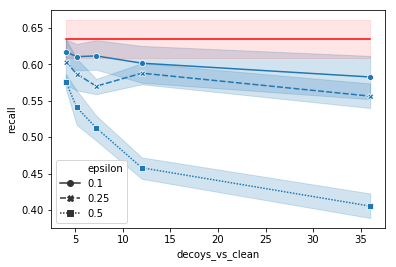

In [96]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_casia-webface")))

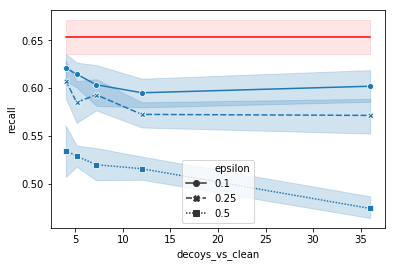

In [97]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

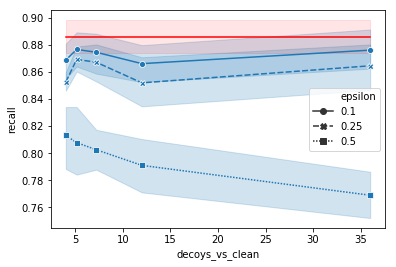

In [98]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

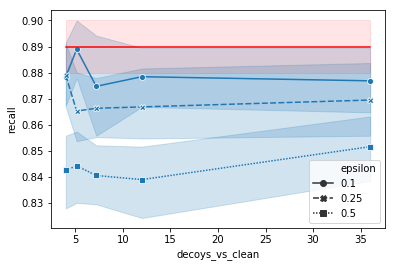

In [99]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_Conv2d_4b_3x3_casia-webface")))

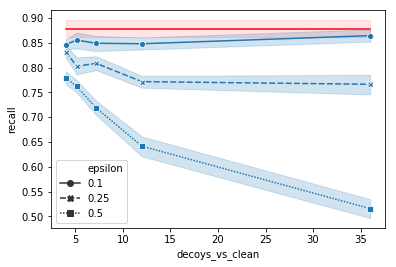

In [3]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_casia-webface")))

In [ ]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_vggface2")))